<a href="https://colab.research.google.com/github/Elmir22/Data-science/blob/main/training_linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np

np.random.seed(42)
m=100
X = 2*np.random.rand(m,1)
y= 4+3*X + np.random.randn(m,1)

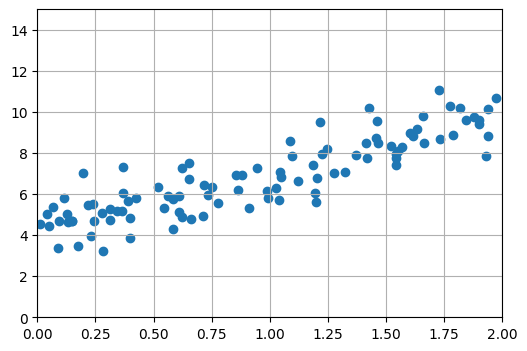

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(X,y)
plt.axis([0,2,0,15])
plt.grid();

In [41]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.7692735413614223

In [42]:
X_new = np.array([[0],[2]])
y_predict = reg.predict(X_new)
y_predict

array([[4.21509616],
       [9.75532293]])

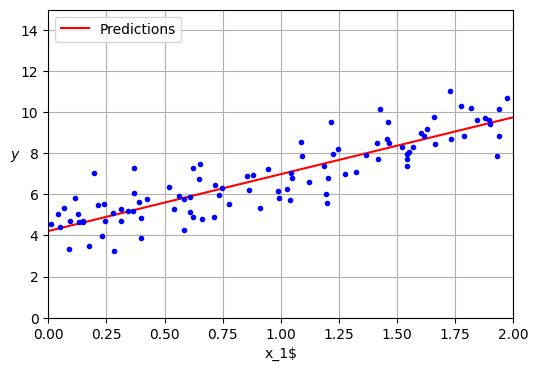

In [43]:
plt.figure(figsize=(6,4))
plt.plot(X_new,y_predict, "r-", label="Predictions")
plt.plot(X,y,"b.")
plt.xlabel("x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.legend(loc="upper left");

In [44]:
import tensorflow as tf

In [45]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), fashion_mnist.load_data()

((array([[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
  
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
  
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
  
         ...,
  
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
         

In [46]:
train_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

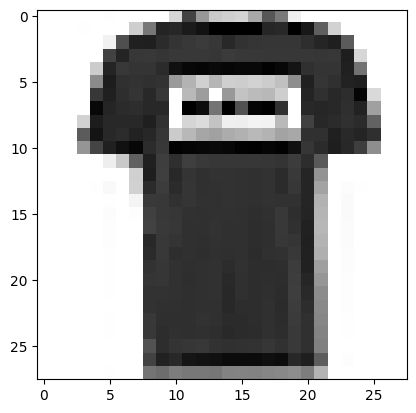

In [47]:
plt.imshow(train_images[1], cmap='binary')

In [48]:
train_images = train_images/255
test_images = test_images/255

In [49]:
train_images[0].shape

(28, 28)

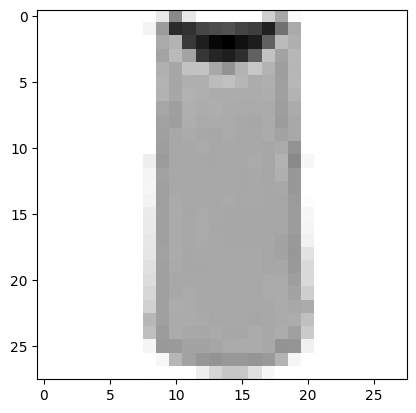

In [50]:
plt.imshow(train_images[2],cmap='binary')

In [51]:
from sklearn.ensemble import RandomForestClassifier

ran = RandomForestClassifier()

ran.fit(train_images.reshape(60000,784),train_labels)

RandomForestClassifier()

In [52]:
ran.score(test_images.reshape(10000,784),test_labels)

0.8755

In [55]:
from sklearn.model_selection import GridSearchCV

forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clf = GridSearchCV(ran, forest_params, cv = 4, scoring='accuracy')

clf.fit(train_images[:10000].reshape(10000,784),train_labels[:10000])

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [56]:
clf.best_params_

{'max_depth': 14, 'max_features': 11}

In [57]:
clf.best_score_

0.847

In [58]:
clf.best_estimator_

RandomForestClassifier(max_depth=14, max_features=11)

In [60]:
clf.best_estimator_.fit(train_images.reshape(60000,784),train_labels)
tuned_accuracy = clf.score(test_images.reshape(10000,784),test_labels)
tuned_accuracy

0.8565